# **Netflix Content Analytics Project**


In [3]:
# ====================================================
# Step 1: Import Required Libraries
# ====================================================
# These are the basic libraries we need for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Display settings (so that large tables show all columns)
pd.set_option("display.max_columns", None)


## 1. Problem Statement
We want to study Netflix’s content library using data.  
The aim is to clean, analyze and extract insights about:
- Movies vs TV Shows distribution
- Release year trends
- Country and genre contributions
- Ratings and durations


## **2. Load & Explore Data**


In [6]:
# Load dataset
data = pd.read_csv("/content/netflix_titles.csv")

# Quick shape & preview
print("Rows, Columns:", data.shape)


Rows, Columns: (8807, 12)


In [8]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **3. Data Cleaning**
Tasks:
1. Handle missing values  
2. Convert data types  
3. Remove duplicates  
4. Split duration column  
5. Make text columns neat


In [11]:
# Filling missing values
data['director'] = data['director'].fillna("Unknown Director")
data['cast'] = data['cast'].fillna("Not Available")
data['country'] = data['country'].fillna("Unknown Country")
data['rating'] = data['rating'].fillna("Not Rated")
data['duration'] = data['duration'].fillna("Unknown")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8807 non-null   object        
 1   type           8807 non-null   object        
 2   title          8807 non-null   object        
 3   director       8807 non-null   object        
 4   cast           8807 non-null   object        
 5   country        8807 non-null   object        
 6   date_added     8709 non-null   datetime64[ns]
 7   release_year   8807 non-null   int64         
 8   rating         8807 non-null   object        
 9   duration       8807 non-null   object        
 10  listed_in      8807 non-null   object        
 11  description    8807 non-null   object        
 12  duration_int   8804 non-null   float64       
 13  duration_type  8807 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 963

In [21]:
# Convert date_added → datetime
data['date_added'] = pd.to_datetime(data['date_added'], errors="coerce")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Not Available,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,min
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Not Available,Unknown Country,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0,Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,min


In [20]:
# Drop duplicates
data = data.drop_duplicates()
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Not Available,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,min
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Not Available,Unknown Country,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0,Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,min


In [19]:
# Strip spaces in text columns
for col in ['title','director','cast','country','rating','listed_in']:
    data[col] = data[col].astype(str).str.strip()
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Not Available,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,min
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Not Available,Unknown Country,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0,Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,min


In [18]:
# Extract numbers and units from duration
data['duration_int'] = data['duration'].str.extract(r'(\d+)')
data['duration_int'] = pd.to_numeric(data['duration_int'], errors="coerce")
data['duration_type'] = data['duration'].str.extract(r'([a-zA-Z]+)')

data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Not Available,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,min
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Not Available,Unknown Country,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0,Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,min


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8807 non-null   object        
 1   type           8807 non-null   object        
 2   title          8807 non-null   object        
 3   director       8807 non-null   object        
 4   cast           8807 non-null   object        
 5   country        8807 non-null   object        
 6   date_added     8709 non-null   datetime64[ns]
 7   release_year   8807 non-null   int64         
 8   rating         8807 non-null   object        
 9   duration       8807 non-null   object        
 10  listed_in      8807 non-null   object        
 11  description    8807 non-null   object        
 12  duration_int   8804 non-null   float64       
 13  duration_type  8807 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 963

## **4. Exploratory Data Analysis (EDA)**
*Let’s explore distributions and relationships.*


/tmp/ipython-input-43101412.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette="pastel")


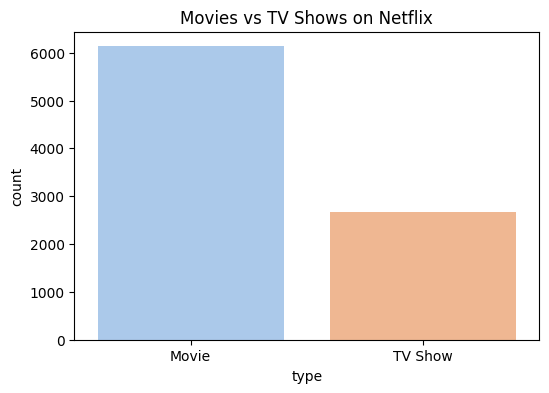

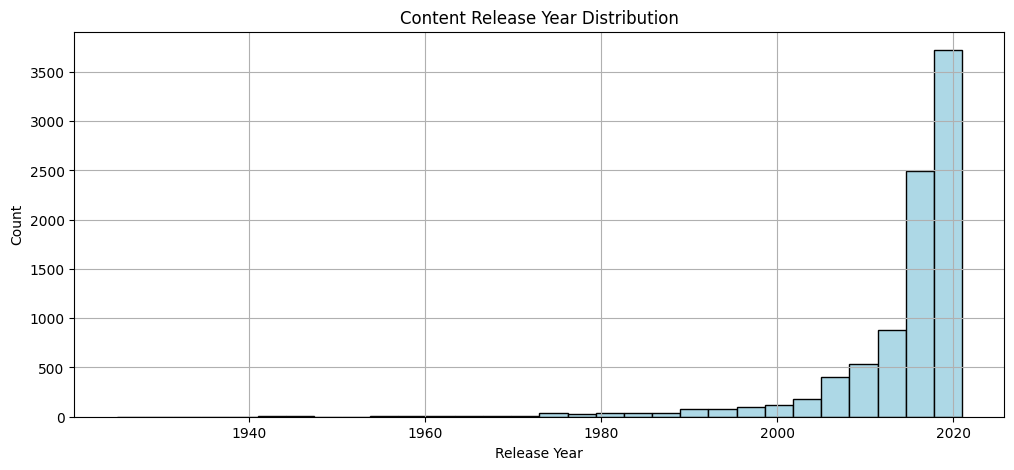

/tmp/ipython-input-43101412.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="muted")


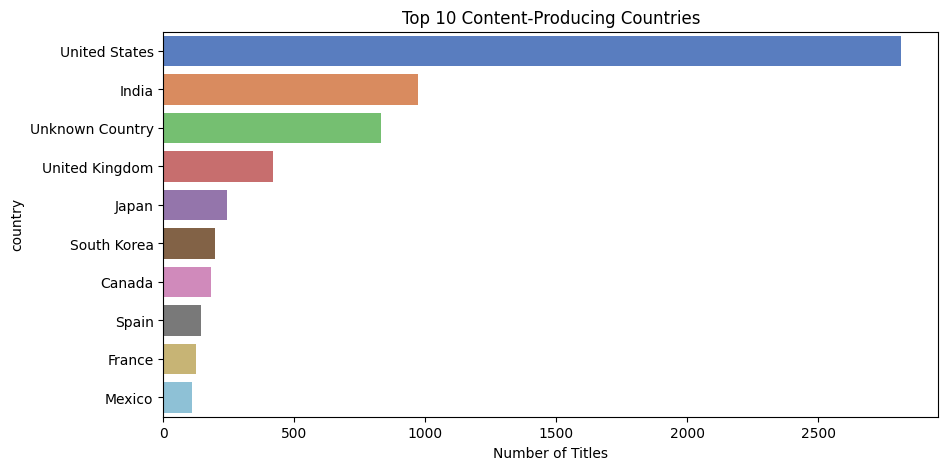

In [27]:
# Movies vs TV Shows count

plt.figure(figsize=(6,4))
sns.countplot(x='type', data=data, palette="pastel")
plt.title("Movies vs TV Shows on Netflix")
plt.show()

# Release year histogram

plt.figure(figsize=(12,5))
data['release_year'].hist(bins=30, color='lightblue', edgecolor='black')
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Content Release Year Distribution")
plt.show()

# Top 10 countries

top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="muted")
plt.title("Top 10 Content-Producing Countries")
plt.xlabel("Number of Titles")
plt.show()


## **5. Statistical Analysis**
*We apply basic statistical concepts here.*


In [28]:
# Descriptive stats for duration
print("Duration statistics:")
print(data['duration_int'].describe())

# Chi-Square test → relation between type and rating
crosstab = pd.crosstab(data['type'], data['rating'])
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print(f"\nChi-Square test: chi2={chi2:.2f}, p={p:.4f}")

# T-test → compare avg movie duration vs TV shows seasons
movies = data[data['type']=="Movie"]['duration_int'].dropna()
shows = data[data['type']=="TV Show"]['duration_int'].dropna()
t_stat, p_val = stats.ttest_ind(movies, shows, equal_var=False, nan_policy='omit')
print(f"\nT-test: t={t_stat:.2f}, p={p_val:.4f}")


Duration statistics:
count    8804.000000
mean       69.846888
std        50.814828
min         1.000000
25%         2.000000
50%        88.000000
75%       106.000000
max       312.000000
Name: duration_int, dtype: float64

Chi-Square test: chi2=1048.25, p=0.0000

T-test: t=269.69, p=0.0000


## **6. Feature Engineering**
We create extra useful columns.


In [29]:
# Year & month when content was added
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

# Binary column → is it a movie?
data['is_movie'] = (data['type']=="Movie").astype(int)

data[['title','type','year_added','month_added','is_movie']].head()


,title,type,year_added,month_added,is_movie
0,Dick Johnson Is Dead,Movie,2021.0,9.0,1
1,Blood & Water,TV Show,2021.0,9.0,0
2,Ganglands,TV Show,2021.0,9.0,0
3,Jailbirds New Orleans,TV Show,2021.0,9.0,0
4,Kota Factory,TV Show,2021.0,9.0,0


# **ADVANCED ANALYTICS**

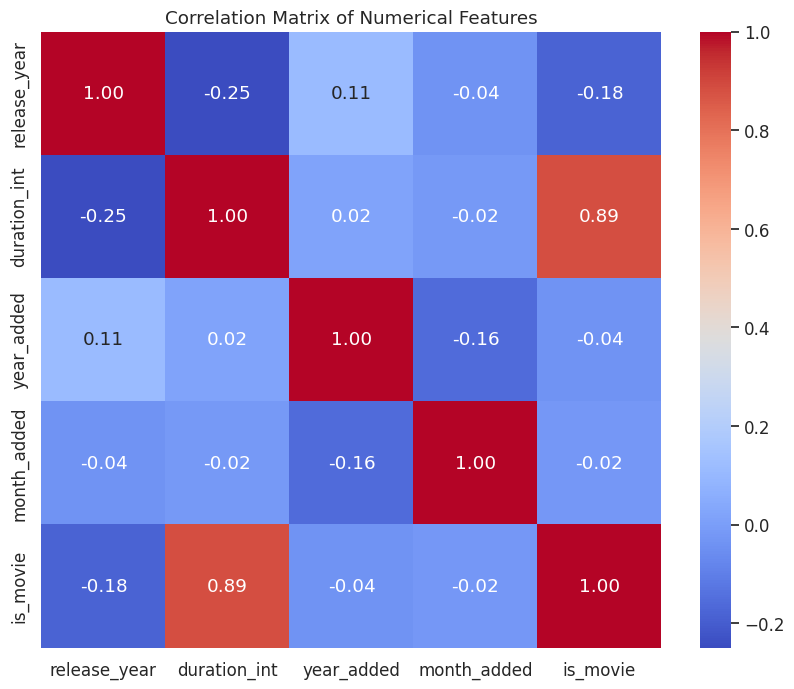

Highly correlated pairs:
 duration_int  is_movie        0.885421
is_movie      duration_int    0.885421
dtype: float64
Highly correlated pairs:
 duration_int  is_movie        0.885421
is_movie      duration_int    0.885421
dtype: float64


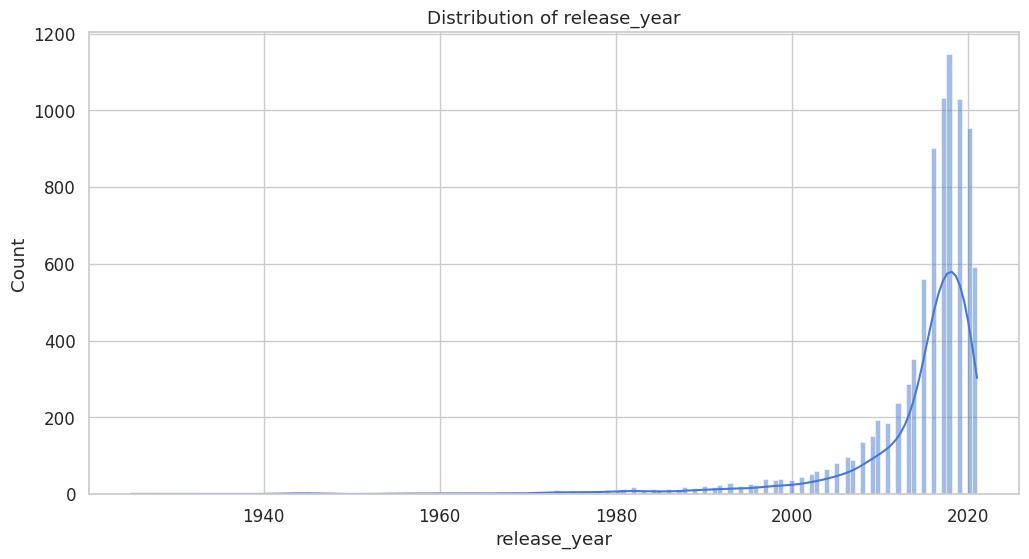

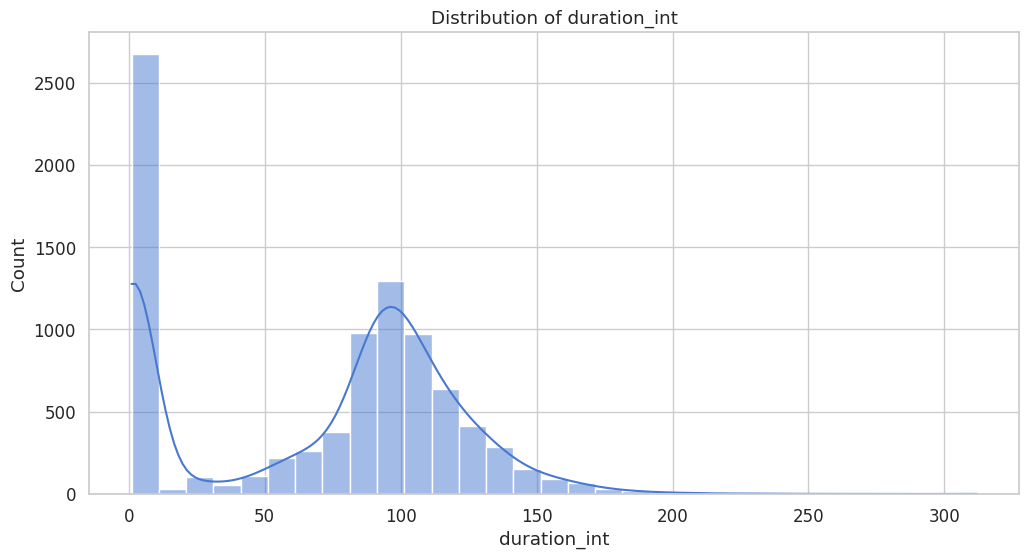

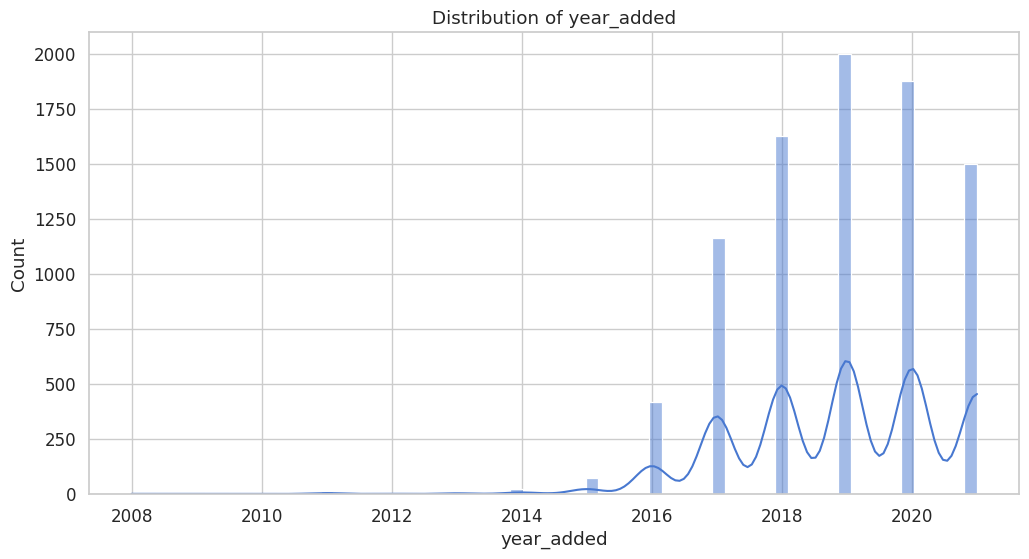

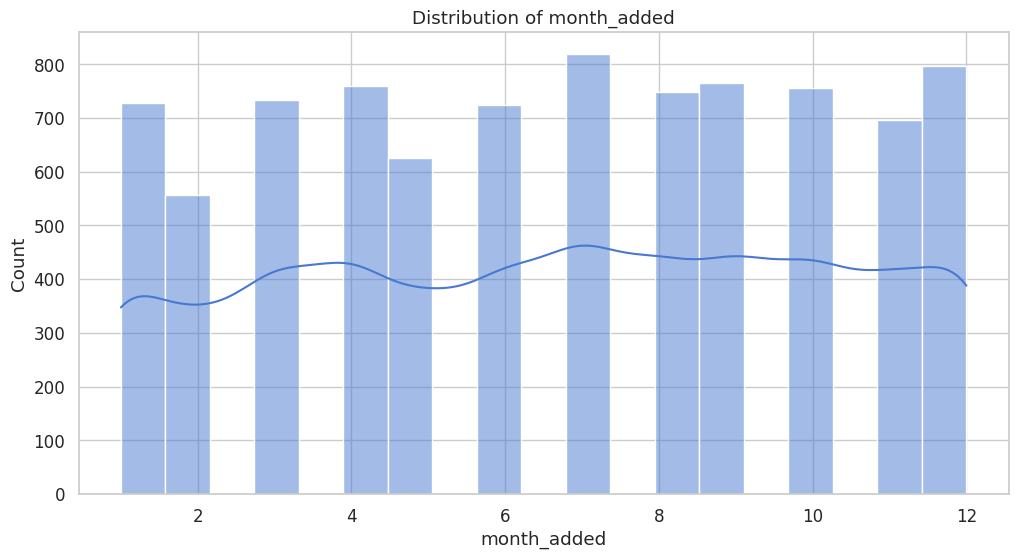

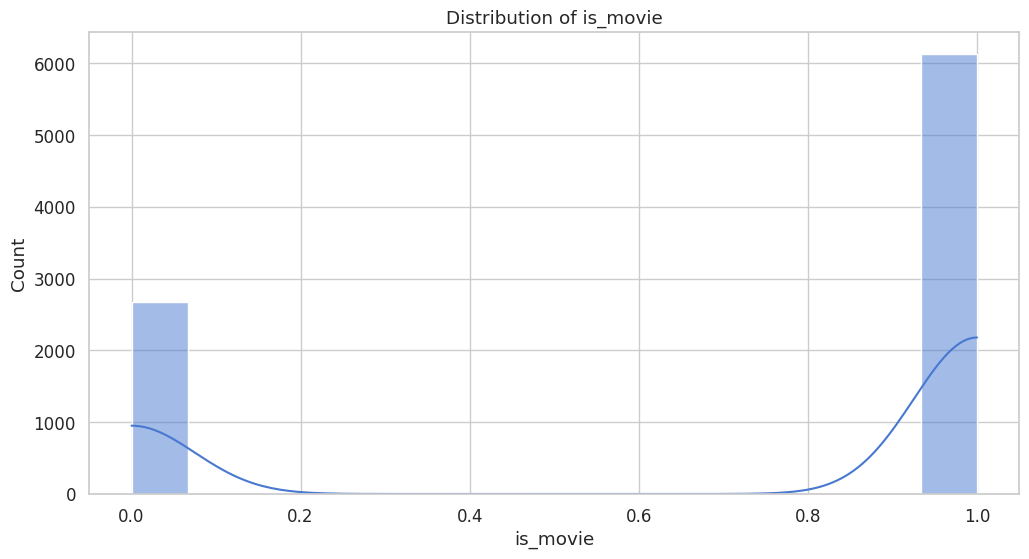

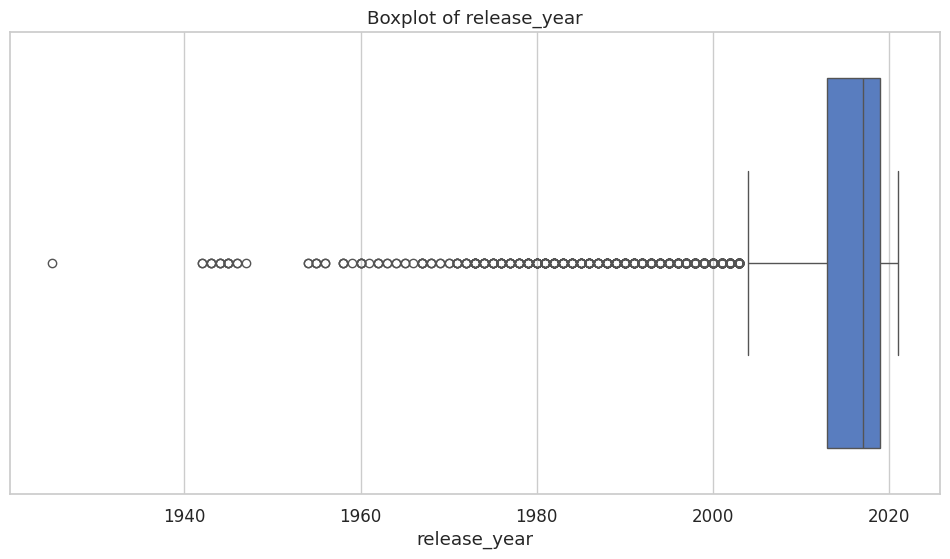

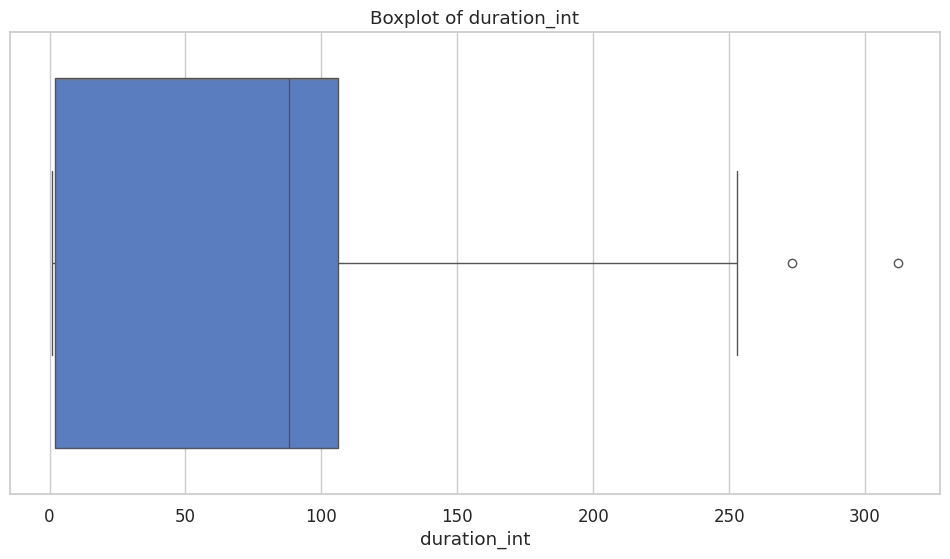

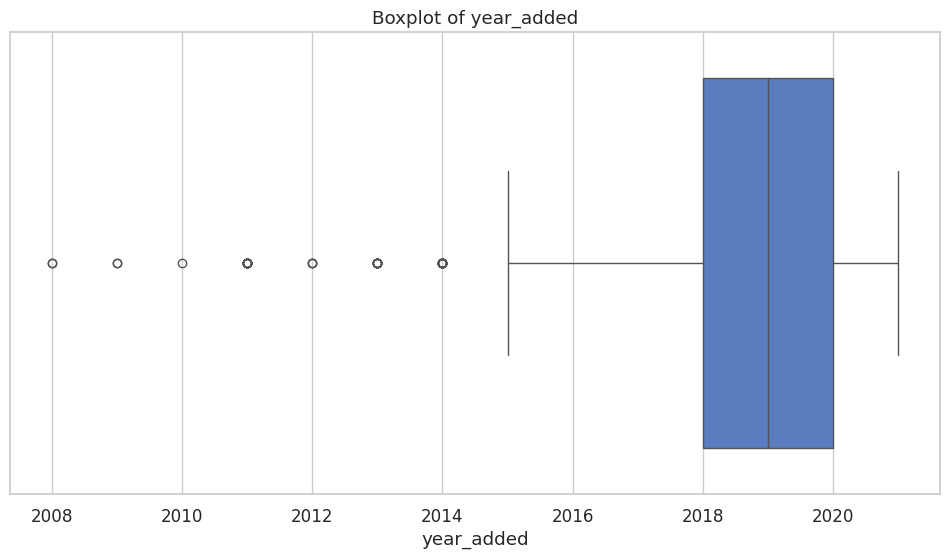

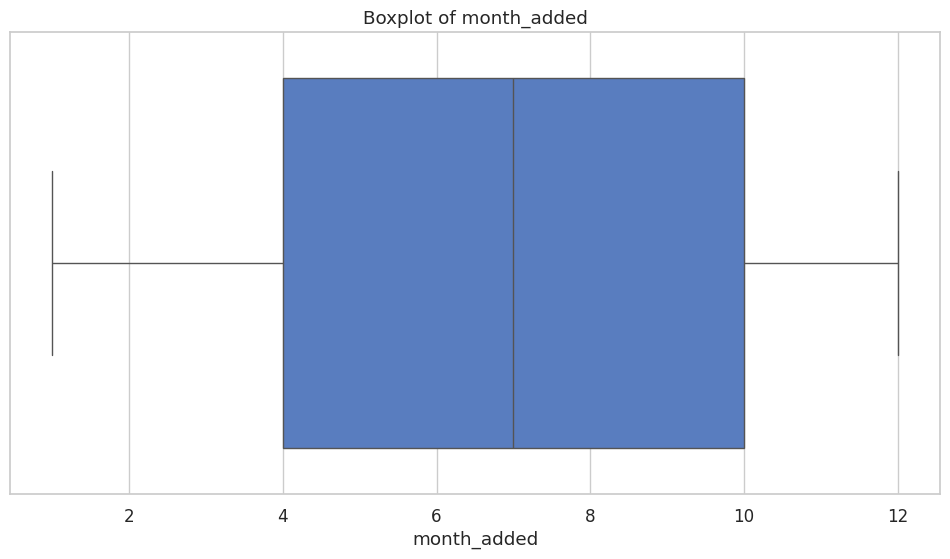

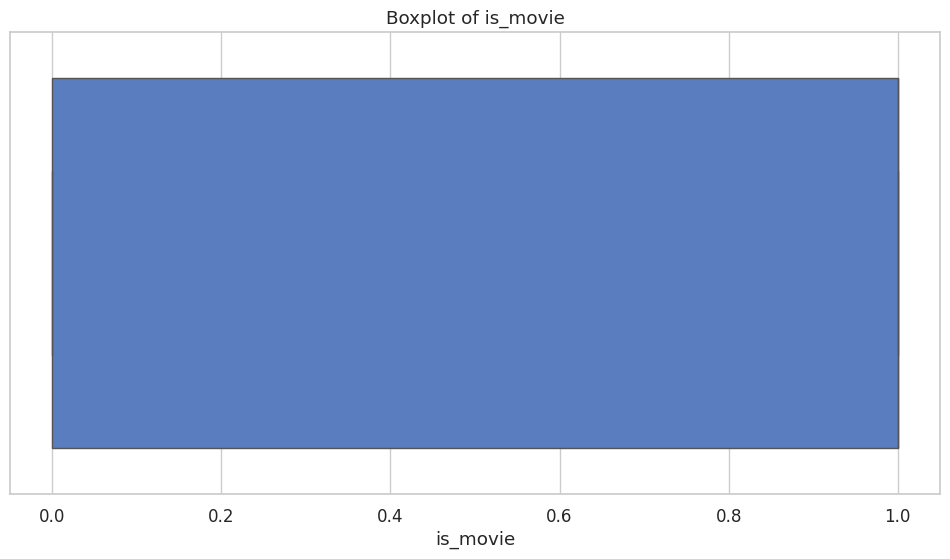

In [32]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12,6)

# ===== 1. Correlation Analysis (numeric only) =====
numeric_cols = data.select_dtypes(include=np.number).columns
corr_matrix = data[numeric_cols].corr()  # use only numeric columns

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Highly correlated pairs
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[(corr_pairs > 0.6) & (corr_pairs < 1)].sort_values(ascending=False)
print("Highly correlated pairs:\n", corr_pairs)

# Highly correlated pairs
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[(corr_pairs > 0.6) & (corr_pairs < 1)].sort_values(ascending=False)
print("Highly correlated pairs:\n", corr_pairs)

# ===== 2. Trend Analysis Over Time =====
if 'Year' in data.columns:
    yearly_counts = data.groupby('Year').size()
    yearly_counts.plot(kind='line', marker='o', title='Records Trend Over Years')
    plt.ylabel('Count')
    plt.show()

    if 'Rating' in data.columns:
        data.groupby('Year')['Rating'].mean().plot(marker='o', title='Average Rating Over Years')
        plt.ylabel('Average Rating')
        plt.show()

# ===== 3. Grouped Analysis =====
if 'Category' in data.columns and 'Rating' in data.columns:
    category_rating = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
    sns.barplot(x=category_rating.values, y=category_rating.index)
    plt.title('Average Rating by Category')
    plt.show()

# ===== 4. Multi-Feature Insights =====
if 'Category' in data.columns and 'Year' in data.columns and 'Rating' in data.columns:
    pivot = data.pivot_table(index='Category', columns='Year', values='Rating', aggfunc='mean')
    sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
    plt.title("Average Rating by Category and Year")
    plt.show()

# ===== 5. Distribution Analysis =====
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# ===== 6. Outlier Detection =====
for col in numerical_cols:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# ===== 7. Actionable Insights Table =====
if 'Category' in data.columns and 'Rating' in data.columns:
    top_categories = data.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
    print("Top 10 Categories by Average Rating:\n", top_categories)


In [34]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12,6)
plt.show()